# EDA

In [166]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from ast import literal_eval

from collections import defaultdict

In [2]:
def get_hashtag_counts(json):
    
    # Create empty dict where values are stored
    hashtag_count = defaultdict(int)
    
    # Iterate over all tweets, retrieve their hashtags and increment the counter by one
    for tweet in json["data"]:
        try:
            hashtags = tweet["entities"]["hashtags"]
            for hashtag in hashtags:
                hashtag_count[hashtag["tag"]] +=1
        except KeyError:
            continue
            
    return hashtag_count

def get_annotation_counts(json):
    
    annotation_count = defaultdict(int)

    for tweet in json["data"]:
        try:
            annotations = tweet["entities"]["annotations"]
            for annotation in annotations:
                annotation_count[annotation["normalized_text"]] +=1
        except KeyError:
            continue
            
    return annotation_count

In [3]:
def get_entity_count(series):
    dict_count = defaultdict(int)
    
    for entities in series:
        for entity in entities:
            if len(entity) > 0:
                dict_count[entity] += 1
            
    return dict_count

In [180]:
def get_entity_count_by_interval(df,interval,entity_type):
    entity_df = pd.DataFrame()
    
    if interval == "week":
        col_name = "year_calendar_week"
    elif interval == "month":
        col_name = "year_month"
        
    entity_type = entity_type.lower()
        
    df_sorted = df.sort_values(["created_at"])
    periods = list(df_sorted[col_name].drop_duplicates())
    
    for period in periods:
        df_sliced = df[df[col_name] == period]
        entity_count = get_entity_count(df_sliced[entity_type])
        entity_count_sorted = sorted(entity_count.items(), key=lambda x: x[1], reverse=True)
        
        entity_df[period] = pd.DataFrame(entity_count_sorted[:15]).iloc[:,0]
        
    return entity_df

In [4]:
# Read the tweets csv
df_tweets = pd.read_csv(r"C:\Users\jawo19ad\Dropbox (CBS)\Master thesis data\df_tweets.csv",
                        converters={"hashtags": lambda x: x.strip("[]").split(", "),
                                    "mentions": lambda x: x.strip("[]").split(", "),
                                    "annotations": lambda x: x.strip("[]").split(", ")})

# Drop unnecessary index column
df_tweets.drop("Unnamed: 0", axis=1, inplace=True)

# Rename columns
#df_tweets = df_tweets.rename(columns={'public_metrics.retweet_count': 'retweet_count',
#                                      'public_metrics.reply_count': 'reply_count',
#                                      'public_metrics.like_count': 'like_count',
#                                      'public_metrics.quote_count': 'quote_count'})
df_tweets.head()

,source,text,lang,id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,hashtags,mentions,annotations
0,Twitter for Android,There are too many reliable reports and first-...,en,1350390669043499013,2021-01-16T10:33:19.000Z,1327278886380515328,1,0,0,0,"['eritrea', 'bidentakeaction', 'stopwarontigra...",['joebiden'],[]
1,Twitter Web App,"Despite repeated requests, @Refugees and other...",en,1350390657576300544,2021-01-16T10:33:16.000Z,1323903491044188161,0,0,0,0,"['tigray', 'stopwarontigray', 'tigraygenocide'...","['refugees', 'un', 'joebiden']","['shimelba', 'hitsats']"
2,Twitter for Android,"“When the air bombing and the attacks began, I...",en,1350390643986599937,2021-01-16T10:33:13.000Z,1324130252008816640,0,0,1,0,['bidentakeaction'],"['joebiden', 'kamalaharris', 'yohannesabraham']",[]
3,Twitter Web App,"""ongoing insecurity &amp; allegations of grave...",en,1350390618695020546,2021-01-16T10:33:07.000Z,1112761003,0,0,0,0,"['tigraygenocide', 'bidenactnow', 'protectrefu...","['un', 'joebiden', 'eu_commission', 'refugees'...",['eritrea']
4,Twitter for iPhone,"MOTHER \n\nMother, I do not cry who cries, \nm...",en,1350390607928295424,2021-01-16T10:33:04.000Z,1212824799107375105,0,1,0,0,[],[],[]


### Most frequent hashtags, mentions, and annotations

In [5]:
hashtag_count = get_entity_count(df_tweets["hashtags"])
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[("'refugees'", 75317),
 ("'tigraygenocide'", 72300),
 ("'tigray'", 61415),
 ("'covid19'", 52651),
 ("'s386'", 38500),
 ("'stopwarontigray'", 33835),
 ("'migrants'", 33357),
 ("'immigrants'", 32076),
 ("'ethiopia'", 26012),
 ("'immigration'", 25445),
 ("'refugee'", 23878),
 ("'iraqi_refugees_look_for_homeland'", 23353),
 ("'dv2020'", 20562),
 ("'dv2021'", 20269),
 ("'worldrefugeeday'", 17910),
 ("'unblocks386'", 17321),
 ("'refugeeswelcome'", 16179),
 ("'passs386'", 13673),
 ("'eritrea'", 13287),
 ("'allowaccesstotigray'", 13147),
 ("'immigrant'", 12955),
 ("'passhr1044'", 12900),
 ("'sudan'", 12234),
 ("'migration'", 12084),
 ("'standwithiraqirefugees'", 11995)]

In [6]:
mention_count = get_entity_count(df_tweets["mentions"])
mention_count_sorted = sorted(mention_count.items(), key=lambda x: x[1], reverse=True)
mention_count_sorted[:25]

[("'realdonaldtrump'", 145428),
 ("'refugees'", 129576),
 ("'joebiden'", 95065),
 ("'pritipatel'", 84930),
 ("'un'", 66752),
 ("'potus'", 62046),
 ("'nigel_farage'", 60651),
 ("'change'", 48592),
 ("'borisjohnson'", 40016),
 ("'kamalaharris'", 36178),
 ("'hrw'", 31772),
 ("'senatordurbin'", 30059),
 ("'vp'", 26087),
 ("'unhumanrights'", 25801),
 ("'senrickscott'", 24826),
 ("'amnesty'", 24228),
 ("'youtube'", 23672),
 ("'filippograndi'", 23551),
 ("'eu_commission'", 23530),
 ("'repzoelofgren'", 22316),
 ("'cnn'", 22062),
 ("'skynews'", 21293),
 ("'aoc'", 20592),
 ("'ukhomeoffice'", 18801),
 ("'abiyahmedali'", 18796)]

In [7]:
annotation_count = get_entity_count(df_tweets["annotations"])
annotation_count_sorted = sorted(annotation_count.items(), key=lambda x: x[1], reverse=True)
annotation_count_sorted[:25]

[("'trump'", 418727),
 ("'us'", 224249),
 ("'uk'", 217711),
 ("'america'", 199730),
 ("'biden'", 156215),
 ("'france'", 95153),
 ("'turkey'", 91625),
 ("'canada'", 89973),
 ("'europe'", 89914),
 ("'u.s.'", 81832),
 ("'india'", 73498),
 ("'americans'", 70829),
 ("'usa'", 69679),
 ("'obama'", 63827),
 ("'mexico'", 56055),
 ("'china'", 55365),
 ("'eu'", 53270),
 ("'germany'", 52811),
 ("'britain'", 44062),
 ("'greece'", 41809),
 ("'united states'", 41585),
 ("'democrats'", 41420),
 ("'australia'", 39624),
 ("'god'", 38349),
 ("'sudan'", 36976)]

### Add additional date columns (Year, Month, Calendar Week, etc)

In [11]:
df_tweets["created_at"] = pd.to_datetime(df_tweets["created_at"])

In [24]:
str(df_tweets["created_at"].dt.year[0])

'2021'

In [89]:
df_tweets["year"] = df_tweets["created_at"].dt.year.astype(str)
df_tweets["calendar_week"] = df_tweets["created_at"].apply(lambda x: x.strftime("%W")) #Monday considered as first day of the week
df_tweets["year_month"] = df_tweets["year"] + "_" + df_tweets["created_at"].dt.month.astype(str)
df_tweets["year_calendar_week"] = df_tweets["year"] + "_" + df_tweets["calendar_week"]

In [90]:
df_tweets.head()

,source,text,lang,id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,...,annotations,year_month,calendar_week,year,year_calendar_week,refugee,migrant,immigrant,asylum_seeker,other
0,Twitter for Android,There are too many reliable reports and first-...,en,1350390669043499013,2021-01-16 10:33:19+00:00,1327278886380515328,1,0,0,0,...,[],2021_1,02,2021,2021_02,True,False,False,False,False
1,Twitter Web App,"Despite repeated requests, @Refugees and other...",en,1350390657576300544,2021-01-16 10:33:16+00:00,1323903491044188161,0,0,0,0,...,"['shimelba', 'hitsats']",2021_1,02,2021,2021_02,True,False,False,False,False
2,Twitter for Android,"“When the air bombing and the attacks began, I...",en,1350390643986599937,2021-01-16 10:33:13+00:00,1324130252008816640,0,0,1,0,...,[],2021_1,02,2021,2021_02,False,False,False,False,True
3,Twitter Web App,"""ongoing insecurity &amp; allegations of grave...",en,1350390618695020546,2021-01-16 10:33:07+00:00,1112761003,0,0,0,0,...,['eritrea'],2021_1,02,2021,2021_02,True,False,False,False,False
4,Twitter for iPhone,"MOTHER \n\nMother, I do not cry who cries, \nm...",en,1350390607928295424,2021-01-16 10:33:04+00:00,1212824799107375105,0,1,0,0,...,[],2021_1,02,2021,2021_02,True,False,False,False,False


In [91]:
df_tweets["refugee"] = df_tweets["text"].apply(lambda x: ("refugee" or "refugees") in x.lower())
df_tweets["migrant"] = df_tweets["text"].apply(lambda x: ("migrant" or "migrants") in x.lower())
df_tweets["immigrant"] = df_tweets["text"].apply(lambda x: ("immigrant" or "immigrants") in x.lower())
df_tweets["asylum_seeker"] = df_tweets["text"].apply(lambda x: ("asylum" and ("seeker" or "seekers")) in x.lower())
df_tweets["other"] = df_tweets["text"].apply(lambda x: (("displaced" or "stateless") and ("people" or "person" or "persons")) in x.lower())

In [92]:
df_tweets.head()

,source,text,lang,id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,...,annotations,year_month,calendar_week,year,year_calendar_week,refugee,migrant,immigrant,asylum_seeker,other
0,Twitter for Android,There are too many reliable reports and first-...,en,1350390669043499013,2021-01-16 10:33:19+00:00,1327278886380515328,1,0,0,0,...,[],2021_1,02,2021,2021_02,True,False,False,False,False
1,Twitter Web App,"Despite repeated requests, @Refugees and other...",en,1350390657576300544,2021-01-16 10:33:16+00:00,1323903491044188161,0,0,0,0,...,"['shimelba', 'hitsats']",2021_1,02,2021,2021_02,True,False,False,False,False
2,Twitter for Android,"“When the air bombing and the attacks began, I...",en,1350390643986599937,2021-01-16 10:33:13+00:00,1324130252008816640,0,0,1,0,...,[],2021_1,02,2021,2021_02,False,False,False,False,True
3,Twitter Web App,"""ongoing insecurity &amp; allegations of grave...",en,1350390618695020546,2021-01-16 10:33:07+00:00,1112761003,0,0,0,0,...,['eritrea'],2021_1,02,2021,2021_02,True,False,False,False,False
4,Twitter for iPhone,"MOTHER \n\nMother, I do not cry who cries, \nm...",en,1350390607928295424,2021-01-16 10:33:04+00:00,1212824799107375105,0,1,0,0,...,[],2021_1,02,2021,2021_02,True,False,False,False,False


### Frequency of Tweets over Time (also seperated by refugee/migrant/etc.)

In [93]:
df_tweets.columns

Index(['source', 'text', 'lang', 'id', 'created_at', 'author_id',
       'retweet_count', 'reply_count', 'like_count', 'quote_count', 'hashtags',
       'mentions', 'annotations', 'year_month', 'calendar_week', 'year',
       'year_calendar_week', 'refugee', 'migrant', 'immigrant',
       'asylum_seeker', 'other'],
      dtype='object')

In [94]:
# Group data by calendar week
df_tweets_by_week = df_tweets.groupby(["year_calendar_week"])['refugee', 'migrant', 'immigrant', 'asylum_seeker', 'other'].sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [95]:
df_tweets_by_week["total"] = df_tweets_by_week.sum(axis=1)

In [96]:
df_tweets_by_week.head()

,refugee,migrant,immigrant,asylum_seeker,other,total
year_calendar_week,,,,,,
2020_22,38086,179661,110803,6157,27971,362678
2020_23,36608,128397,77720,6366,20929,270020
2020_24,84044,128196,89324,14129,26372,342065
2020_25,54751,124429,84959,22243,24697,311079
2020_26,40770,110147,79277,8720,19946,258860


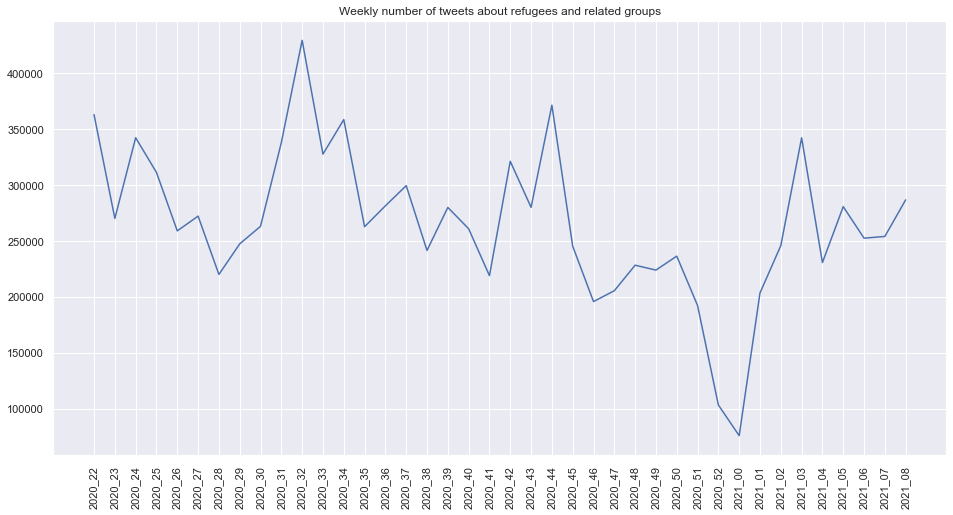

In [103]:
plt.figure(figsize=(16, 8))
plt.plot(df_tweets_by_week["total"])
plt.title("Weekly number of tweets about refugees and related groups")
plt.xticks(rotation=90)
plt.show()

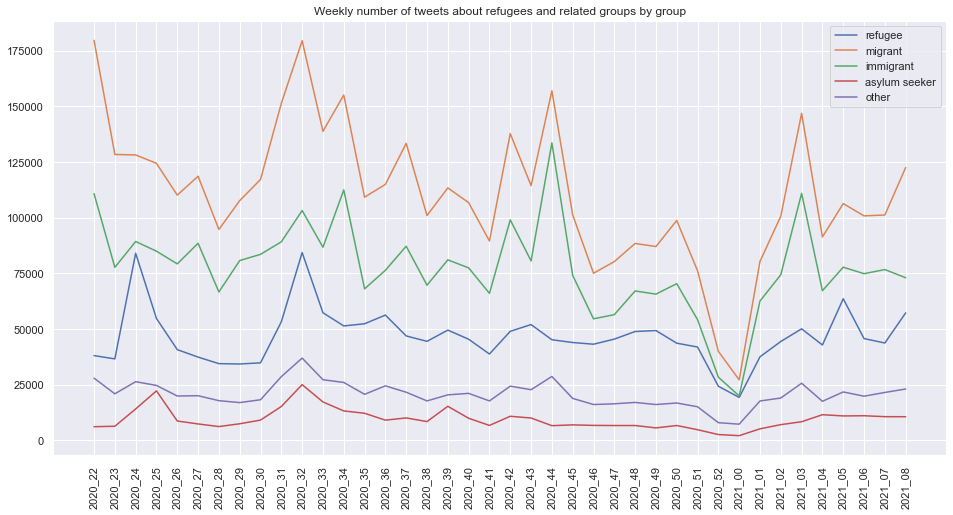

In [105]:
plt.figure(figsize=(16, 8))
plt.plot(df_tweets_by_week["refugee"], label ="refugee")
plt.plot(df_tweets_by_week["migrant"], label ="migrant")
plt.plot(df_tweets_by_week["immigrant"], label ="immigrant")
plt.plot(df_tweets_by_week["asylum_seeker"], label ="asylum seeker")
plt.plot(df_tweets_by_week["other"], label ="other")
plt.title("Weekly number of tweets about refugees and related groups by group")
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Most frequent hashtags per month

In [177]:
df_hashtags_month = get_entity_count_by_interval(df_tweets,"month","hashtags")
df_hashtags_month

,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12,2021_1,2021_2
0,'worldrefugeeday','s386','refugees','refugees','refugees','refugees','tigray','tigraygenocide','tigraygenocide'
1,'covid19','passs386','covid19','s386isfair','armenia','tigray','stopwarontigray','tigray','tigray'
2,'refugees','covid19','migrants','rickcantonesescott','covid19','covid19','passhr1044','stopwarontigray','allowaccesstotigray'
3,'migrants','durbinliesimmigrantsdie','unblocks386','covid19','artsakh','immigrants','refugees','bidenactnow','dv2020'
4,'refugeeweek2020','refugees','s386','s386','migrants','stopwarontigray','ethiopia','dv2021','dv2021'
5,'immigration','immigrants','refugeeswelcome','iraqi_refugees_look_for_homeland','immigrants','ethiopia','hr1044good4usa','dv2020','pp10014'
6,'blacklivesmatter','immigration','immigrantsdiewhendurbinlies','migrants','debates2020','iraqi_refugees_look_for_homeland','tigraygenocide','bidentakeaction','refugees'
7,'s386','unblocks386','immigrants','moria','iraqi_refugees_look_for_homeland','migrants','hr1044mustpass','ethiopia','unityforethiopia'
8,'immigrants','immigrantsdiewhendurbinlies','durbinfightsoutsourcerslie','stopicetransfers','immigration','tigraygenocide','keepyourpromise','refugees','tplf'
9,'refugee','migrants','webackdurbin','unblocks386','refugee','immigration','sudan','noban','ethiopia'


In [178]:
df_mentions_month = get_entity_count_by_interval(df_tweets,"month","mentions")
df_mentions_month

,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12,2021_1,2021_2
0,'change','realdonaldtrump','pritipatel','realdonaldtrump','realdonaldtrump','realdonaldtrump','refugees','joebiden','potus'
1,'realdonaldtrump','senatordurbin','nigel_farage','senrickscott','joebiden','refugees','repzoelofgren','refugees','refugees'
2,'refugees','dnc','realdonaldtrump','pritipatel','refugees','joebiden','un','un','vp'
3,'nigel_farage','dncwarroom','borisjohnson','garylineker','pritipatel','pritipatel','senmikelee','kamalaharris','un'
4,'pritipatel','refugees','skynews','refugees','laurenwitzkede','kamalaharris','realdonaldtrump','potus','secblinken'
5,'sonusood','nigel_farage','refugees','nigel_farage','flotus','un','hrw','ablinken','amnesty'
6,'senatordurbin','pritipatel','joebiden','chrishartline','un','hrw','unocha','lindat_g','joebiden'
7,'narendramodi','change','bettemidler','borisjohnson','senrickscott','unhumanrights','joebiden','pritipatel','eu_commission'
8,'borisjohnson','joebiden','senatordurbin','joebiden','youtube','borisjohnson','filippograndi','vp','hrw'
9,'joebiden','iamjohnoliver','benandjerrysuk','change','borisjohnson','abiyahmedali','abiyahmedali','unhumanrights','alimayorkas'


In [179]:
df_annotations_month = get_entity_count_by_interval(df_tweets,"month","annotations")
df_annotations_month

,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12,2021_1,2021_2
0,'trump','trump','uk','trump','trump','trump','trump','trump','biden'
1,'us','us','trump','uk','us','us','us','biden','trump'
2,'america','america','france','us','america','america','uk','us','us'
3,'uk','uk','us','america','uk','biden','america','america','america'
4,'india','canada','america','europe','biden','uk','sudan','uk','uk'
5,'turkey','turkey','europe','greece','france','europe','turkey','tigray','mexico'
6,'canada','u.s.','britain','turkey','u.s.','canada','canada','americans','u.s.'
7,'europe','usa','eu','france','obama','obama','germany','turkey','tigray'
8,'u.s.','india','turkey','canada','canada','turkey','biden','u.s.','ethiopia'
9,'supreme court','americans','canada','eu','europe','sudan','ethiopia','usa','americans'


### Most frequent entities per week

In [181]:
df_hashtags_week = get_entity_count_by_interval(df_tweets,"week","hashtags")
df_hashtags_week

,2020_22,2020_23,2020_24,2020_25,2020_26,2020_27,2020_28,2020_29,2020_30,2020_31,...,2020_52,2021_00,2021_01,2021_02,2021_03,2021_04,2021_05,2021_06,2021_07,2021_08
0,'covid19','covid19','worldrefugeeday','deportallrefugees','covid19','covid19','covid19','s386','immigrantsdiewhendurbinlies','covid19',...,'stopwarontigray','tigraygenocide','tigraygenocide','tigraygenocide','tigraygenocide','tigraygenocide','tigraygenocide','tigraygenocide','tigraygenocide','shameonamnesty'
1,'blacklivesmatter','refugees','refugees','sendbackafghanrefugees','refugees','refugees','karabakhisazerbaijan','passs386','unblocks386','refugees',...,'tigraygenocide','tigray','tigray','tigray','bidenactnow','dv2020','tigray','dv2020','tigray','tigraygenocide'
2,'migrants','migrants','refugeeweek2020','covid19','s386','immigration','refugees','durbinliesimmigrantsdie','s386','migrants',...,'tigray','stopwarontigray','stopwarontigray','bidentakeaction','tigray','dv2021','allowaccesstotigray','allowaccesstotigray','dv2021','unityforethiopia'
3,'refugees','blacklivesmatter','covid19','refugees','yemencrisis','immigrants','humanrights','covid19','durbinfightsoutsourcerslie','s386',...,'ethiopia','ethiopia','ethiopia','dv2021','unscactnow','bidenactnow','dv2020','dv2021','dv2020','tplf'
4,'migrantworkers','immigration','palestinianrefugees','immigration','immigration','s386','osce','refugees','webackdurbin','refugeeswelcome',...,'refugees','dv2021','refugees','dv2020','bidentakeaction','refugees','ethiopia','pp10014','pp10014','tigray'
5,'coronavirus','s386','daca','s386','immigrants','india','stoparmenianoccupation','immigration','covid19','immigrants',...,'stopabiy','djibouti','iraqi_refugees_look_for_homeland','bidenactnow','refugees','tigray','pp10014','tigray','allowaccesstotigray','amnestyusedtplfsources'
6,'immigration','coronavirus','withrefugees','immigrants','migrants','migrants','immigration','immigrants','refugees','webackdurbin',...,'opentigray','blm','eritrea','noban','eritreaoutoftigray','iraqi_refugees_look_for_homeland','dv2021','refugees','refugees','refugees'
7,'migration','migration','yemencrisis','migrants','migration','migration','stoparmenianaggression','trump','passs386','durbinfightsoutsourcerslie',...,'warontigray','ethiopian','sudan','stopwarontigray','dv2020','trudeauactnow','tigraiopen4humanitarianassistance','100daysofgenocide','savediversityvisa','tplfisthecause'
8,'immigrants','immigrants','refugeeweek','standwithiraqirefugees','deportallrefugeesfromsindh','mignation','immigrants','migration','immigrants','immigration',...,'eritrea','refugees','blm','familyvisa','iraqi_refugees_look_for_homeland','stopwarontigray','uplifttigraiethiopia','tigraycantwait','getethiopianfactsright','getethiopianfactsright'
9,'s386','patientsnotpassports','worldrefugeeday2020','migration','refugee','refugee','migrants','freethemall','migrants','immigrationnation',...,'blm','iraqi_refugees_look_for_homeland','famine','refugees','ethiopia','pp10014','unscactnow','immigrants','drabiygovistryinghard','tigrayfacts'


In [182]:
df_mentions_week = get_entity_count_by_interval(df_tweets,"week","mentions")
df_mentions_week

,2020_22,2020_23,2020_24,2020_25,2020_26,2020_27,2020_28,2020_29,2020_30,2020_31,...,2020_52,2021_00,2021_01,2021_02,2021_03,2021_04,2021_05,2021_06,2021_07,2021_08
0,'change','change','refugees','realdonaldtrump','realdonaldtrump','realdonaldtrump','realdonaldtrump','senatordurbin','senatordurbin','pritipatel',...,'refugees','un','un','joebiden','joebiden','potus','potus','potus','potus','refugees'
1,'realdonaldtrump','realdonaldtrump','realdonaldtrump','nigel_farage','change','change','nigel_farage','dnc','iamjohnoliver','nigel_farage',...,'un','refugees','refugees','un','kamalaharris','vp','vp','refugees','refugees','amnesty'
2,'sonusood','refugees','change','refugees','refugees','goyafoods','refugees','dncwarroom','dnc','borisjohnson',...,'hrw','nowthisnews','unhumanrights','refugees','potus','joebiden','refugees','un','secblinken','potus'
3,'refugees','pritipatel','marcomendicino','pritipatel','pritipatel','refugees','pritipatel','realdonaldtrump','nigel_farage','realdonaldtrump',...,'nigel_farage','abiyahmedali','hrw','ablinken','refugees','pritipatel','un','hrw','vp','eu_commission'
4,'ukchange','sonusood','un','borisjohnson','joebiden','joebiden','senatordurbin','pritipatel','realdonaldtrump','skynews',...,'realdonaldtrump','joebiden','realdonaldtrump','kamalaharris','lindat_g','refugees','secblinken','secblinken','joebiden','statedept'
5,'nigel_farage','narendramodi','joebiden','change','marcomendicino','senatordurbin','youtube','refugees','dickdurbin','mouthwaite',...,'joebiden','unhumanrights','usun','lindat_g','ablinken','secblinken','justintrudeau','vp','un','voaamharic'
6,'pritipatel','amitshah','senatordurbin','skynews','senatordurbin','ilhanmn','joebiden','joebiden','pritipatel','change',...,'unhumanrights','7piliers','joebiden','alimayorkas','un','whitehouse','joebiden','eu_commission','alimayorkas','marcgarneau'
7,'narendramodi','senatordurbin','pritipatel','senatordurbin','conservatives','pritipatel','aoc','borisjohnson','borisjohnson','bbcnews',...,'kamalaharris','unesco','abiyahmedali','travelgov','pmtunisia','ablinken','amnesty','joebiden','hrw','vp'
8,'pmoindia','borisjohnson','borisjohnson','joebiden','whitehouse','whitehouse','ilhanmn','nigel_farage','sonusood','senatordurbin',...,'toryboypierce','hrw','antonioguterres','ailanational','gopleader','presssec','unhumanrights','alimayorkas','cnn','nigel_farage'
9,'cdnchange','rahulgandhi','narendramodi','nytimes','uklabour','un','thehill','txcivilrights','refugees','lbc',...,'abiyahmedali','nigel_farage','wfpchief','filippograndi','vp','un','alimayorkas','amnesty','filippograndi','un'


In [183]:
df_annotations_week = get_entity_count_by_interval(df_tweets,"week","annotations")
df_annotations_week

,2020_22,2020_23,2020_24,2020_25,2020_26,2020_27,2020_28,2020_29,2020_30,2020_31,...,2020_52,2021_00,2021_01,2021_02,2021_03,2021_04,2021_05,2021_06,2021_07,2021_08
0,'trump','trump','trump','trump','trump','trump','trump','trump','trump','uk',...,'uk','sudan','trump','trump','biden','biden','biden','biden','biden','biden'
1,'india','america','supreme court','us','america','america','us','us','us','france',...,'trump','tigray','america','biden','trump','trump','trump','us','us','trump'
2,'america','us','turkey','uk','us','us','america','america','uk','trump',...,'us','trump','us','us','us','us','us','trump','america','us'
3,'us','india','us','america','uk','united states','uk','canada','america','us',...,'america','uk','uk','america','america','uk','america','america','trump','uk'
4,'uk','uk','america','u.s.','canada','turkey','turkey','uk','usa','lebanon',...,'brexit day','us','biden','uk','americans','america','tigray','mexico','mexico','america'
5,'canada','turkey','uk','turkey','turkey','uk','canada','usa','france','america',...,'stewart lee','ethiopia','turkey','tigray','u.s.','turkey','eritrea','uk','texas','ethiopia'
6,'europe','canada','world refugee day','glasgow','americans','u.s.','u.s.','u.s.','canada','eu',...,'kent refugees','america','canada','ethiopia','joe biden','europe','ethiopia','u.s.','uk','tigray'
7,'turkey','europe','india','india','india','canada','europe','turkey','europe','britain',...,'canada','turkey','sudan','guatemala','uk','u.s.','uk','usa','u.s.','u.s.'
8,'usa','u.s.','canada','sindh','europe','americans','india','india','india','europe',...,'twitter','um rakuba','tigray','eritrea','usa','napier barracks','u.s.','americans','turkey','europe'
9,'delhi','bjp','daca','canada','china','usa','americans','europe','u.s.','brexit',...,'tigray','eu','usa','usa','mexico','canada','sudan','turkey','americans','qatar'
